# Automated Feature Engineering

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# setting to display max columns
pd.set_option('display.max_columns', 500)

In [11]:
data = pd.read_csv('minimaly_encoded.csv', index_col=0)
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend_encode,Y,VisitorType_encode_0,VisitorType_encode_1,VisitorType_encode_2,quarter_1,quarter_2,quarter_3,quarter_4
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1,0,0,0,1,0,1,0,0,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,1,2,0,0,0,1,0,1,0,0,0
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,4,1,9,3,0,0,0,1,0,1,0,0,0


# Feature engeneering

In [18]:
# visits of one users divided by sum visits to that page 
data['frac_Admin'] = data['Administrative']/sum(data['Administrative'])
data['frac_Info'] = data['Informational']/sum(data['Informational'])
data['fract_Prod'] = data['Informational_Duration']/sum(data['Informational_Duration'])

# divide this by total users in a specific month
def visits_month(df, page):
    # go thorugh the list for unique months
    for month in df['Month'].unique():
        # select the month subset
        month_df = df[df['Month']==month]
        # create a new column in original df and divide the count of user page visits my total monthly visits
        # return same value if in the row if the condition fails
        data['monthPageFrac'] = np.where((df['Month'] == month), df[page]/sum(month_df['Month'], df['Month']) 
        
# visits of one user divided by sum visits to all pages 
data['fractAdminTotal'] = data['Administrative']/(data['Administrative']+data['Informational']+data['Informational'])
data['fractInfoTotal'] = data['Informational']/(data['Administrative']+data['Informational']+data['Informational'])
data['fractProdTotal'] = data['ProductRelated']/(data['Administrative']+data['Informational']+data['Informational'])

# different clustering thersholds but not on the revenue becasue that will overfit 

SyntaxError: invalid syntax (<ipython-input-18-93d54754c8bc>, line 17)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 22 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
monthBin     

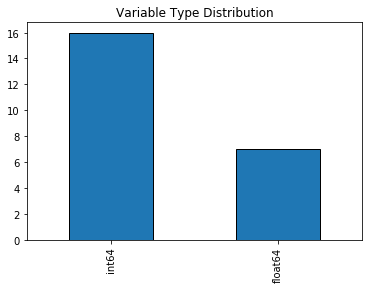

In [6]:
data.dtypes.value_counts().plot.bar(edgecolor = 'k');
plt.title('Variable Type Distribution');

# Steps before
- cleaning (e.g. missing values, create new features Feature tools can build on top of, remove high correlation, )

# EntitySet and Entities
An EntitySet in Featuretools holds all of the tables and the relationships between them. At the moment we only have a single table, but we can create multiple tables through normalization. We'll call the first table data since it contains all the information both at the individual level and at the household level.

In [34]:
hh_bool = data.select_dtypes('int64').drop('Y',axis=1)
hh_cont = data.select_dtypes('float64')

In [11]:
import featuretools as ft
es = ft.EntitySet(id = 'households')
es.entity_from_dataframe(entity_id = 'data', 
                         dataframe = data, 
                         index = 'id')

2020-03-19 05:37:33,542 featuretools.entityset - WARNING    index id not found in dataframe, creating new integer column


Entityset: households
  Entities:
    data [Rows: 12330, Columns: 25]
  Relationships:
    No relationships

In [35]:
es.normalize_entity(base_entity_id='data', 
                    new_entity_id='household', 
                    index = 'idhogar', 
                    additional_variables = hh_bool + hh_cont + ['Y'])
es

ValueError: Unable to coerce to Series, length must be 22: given 1